<a href="https://colab.research.google.com/github/lexinsea/OpioidProject/blob/main/metropolis_monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

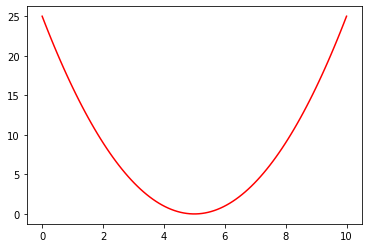

In [ ]:
#1a
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
y=(x - 5)**2

plt.plot(x,y,color='red',label='100K')

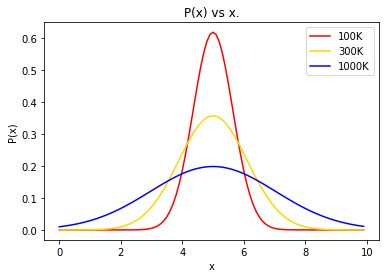

In [ ]:
#1c
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
#define variables
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
list = np.arange(0,10,.1)
#p1.clear()
#p2.clear()
#p3.clear()
f= lambda x:exp((-k * (x - 5) ** 2) / kB / t1) 
j = scipy.integrate.quad(f, 0, 10)
p1=[]
for i in list:
  num=math.pow(math.e,(-k*(i-5)**2)/(kB * t1)) #p(x)=e^(-v(x)/kBT)
  p1.append(num/j[0])

p2=[]
f= lambda x:exp((-k * (x - 5) ** 2) / kB / t2) 
j = scipy.integrate.quad(f, 0, 10)

for i in list:
  num1 = math.pow(math.e,(-k*(i - 5)**2)/(kB*t2)) #p(x)=e^(-v(x)/kBT)/integral of same thing
  p2.append(num1/j[0])

p3=[]
def f(x):
 return exp((-k * (x - 5) ** 2) / kB / t3) 
j = scipy.integrate.quad(f, 0, 10)
for i in list:
  num2=math.pow(math.e,(-k*(i-5)**2)/(kB*t3)) #p(x)=e^(-v(x)/kBT)
  p3.append(num2/j[0])

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.plot(list,p1,color='red',label='100K')
plt.plot(list,p2,color='gold',label='300K')
plt.plot(list,p3,color='blue',label='1000K')
plt.legend()

8.08071799439027 / 1.616143598878054
13.996108342541742 / 2.799221668508348
25.190788373100222 / 5.038157674620045


<function matplotlib.pyplot.show>

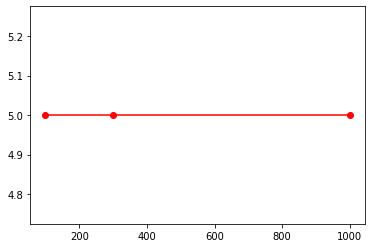

In [ ]:
#1f <x>
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
average = []

for n in [t1, t2, t3]:
  def f(x):
    return exp((-k * (x - 5) ** 2) / kB / n)
  g = lambda x: x * exp((-k * (x - 5) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show


41.07542086600459 / 1.616143598878054
73.47089788706022 / 2.799221668508348
144.84230289162954 / 5.038157674620045


<function matplotlib.pyplot.show>

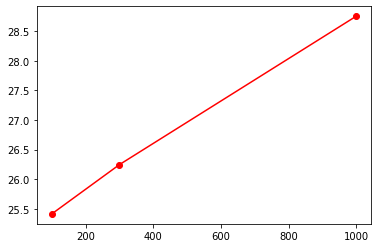

In [ ]:
#1f , <x**2>
average1=[]
#average1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp((-k * (x - 5) ** 2) / kB / n)
  g = lambda x: x**2 * exp((-k**2 * (x - 5) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

0.671830894053244 / 1.616143598878054
3.4903561743515232 / 2.799221668508348
18.88836102612844 / 5.038157674620045


<function matplotlib.pyplot.show>

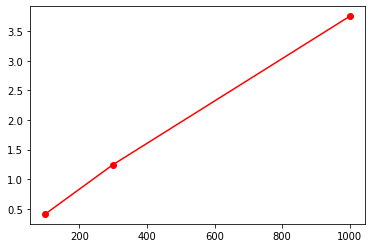

In [ ]:
#1f , <V1>
V1=[]
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp((-k * (x - 5) ** 2) / kB / n)
  g = lambda x: (x - 5) ** 2 * exp((-k**2 * (x - 5) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

# New Section

# Question2

1d.temperature does not play a role therefore, it does not change

https://chryswoods.com/intro_to_mc/part1/metropolis.html

99000
21844 + 78156


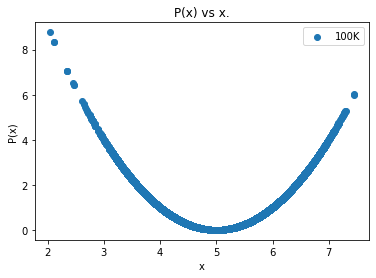

In [ ]:
#2b -100K
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
T = 100
k = 1
def V1(x):
  return (x - 5) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list =[] # creating a list for all the steps partook
eng_list = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list.append(new_energy) 
    steps_list.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list.append(old_energy)
    steps_list.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list = steps_list[1000:] #get rid of first 10% of steps
eng_list = eng_list[1000:] #get rid of first 10% of energies
print(len(eng_list)) #proofs that first 10% of the numbers were discarded
#print(steps_list)
#print(eng_list)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list,eng_list,label='100K')

plt.legend()


99000


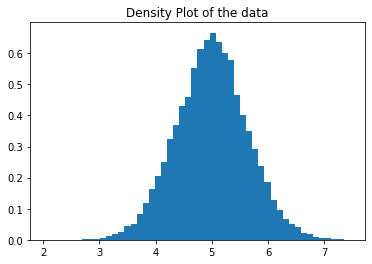

In [ ]:
#2b - 100K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

#prob_density = kde.gaussian_kde(steps_list)
#prob_density.covariance_factor = lambda : .25
#prob_density._compute_covariance()

x = np.linspace(0,10,100000)
#y=prob_density(x)
print(len(steps_list))

#plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list, bins=50, density = True)
plt.show()

99000
38672 + 61328


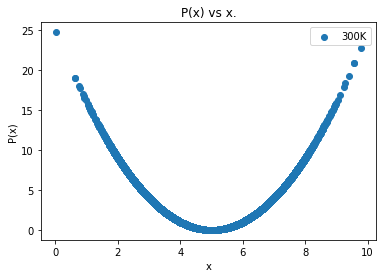

In [ ]:
#2b -300K
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
T = 300
k = 1
def V1(x):
  return (x - 5) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list1 =[] # creating a list for all the steps partook
eng_list1 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list1.append(new_energy) 
    steps_list1.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list1.append(old_energy)
    steps_list1.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list1 = steps_list1[1000:] #get rid of first 10% of steps
eng_list1 = eng_list1[1000:] #get rid of first 10% of energies
print(len(eng_list1)) #proofs that first 10% of the numbers were discarded
#print(steps_list1)
#print(eng_list1)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list1,eng_list1,label='300K')

plt.legend()


In [ ]:
#2b - 300K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list1)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0,10,100000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list1, bins=100, density = True)
plt.show()

KeyboardInterrupt: ignored

99000
66308 + 33692


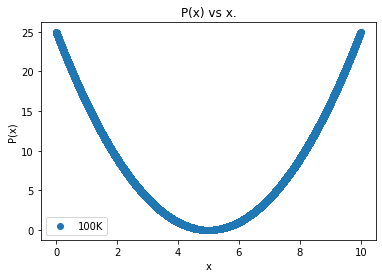

In [ ]:
eng_list.clear()
steps_list2.clear()
#2b -1000K
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
T = 1000
k = 1
def V1(x):
  return (x - 5) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list2 =[] # creating a list for all the steps partook
eng_list2 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list2.append(new_energy) 
    steps_list2.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list2.append(old_energy)
    steps_list2.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list2 = steps_list2[1000:] #get rid of first 10% of steps
eng_list2 = eng_list2[1000:] #get rid of first 10% of energies
print(len(eng_list2)) #proofs that first 10% of the numbers were discarded
#print(steps_list2)
#print(eng_list2)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list2,eng_list2,label='100K')

plt.legend()

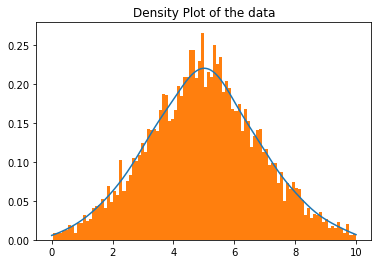

In [ ]:
#2b - 1000K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list2)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0,10,10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list2, bins=100, density = True)
plt.show()

<function matplotlib.pyplot.show>

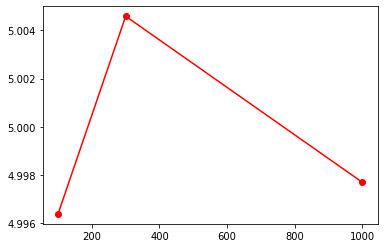

In [ ]:
#2d <x> #run 2b montecarlo again if this doesn't work
average = []


def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           
    
    avg = sum_num / len(num)
    return avg
for i in [steps_list,steps_list1,steps_list2]:
  average.append(cal_average(i))
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

<function matplotlib.pyplot.show>

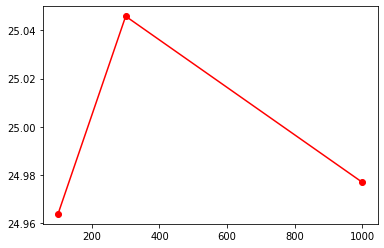

In [ ]:
average1 = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg ** 2
for i in [steps_list,steps_list1,steps_list2]:
  average1.append(cal_average(i))
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

0.671830894053244 / 1.616143598878054
3.4903561743515232 / 2.799221668508348
18.88836102612844 / 5.038157674620045


<function matplotlib.pyplot.show>

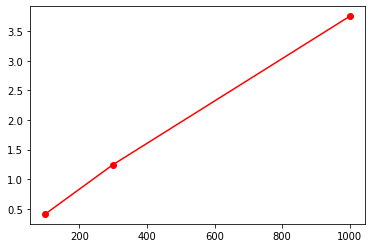

In [ ]:
#2d , <V1>
V1=[]
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp((-k * (x - 5) ** 2) / kB / n)
  g = lambda x: (x - 5) ** 2 * exp((-k**2 * (x - 5) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

# Question3

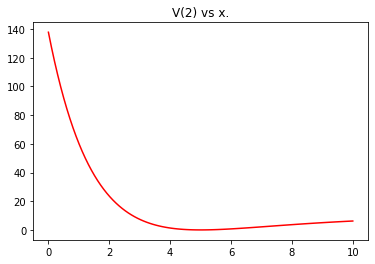

In [ ]:
#3a
import matplotlib.pyplot as plt
De = 10
a = 0.31
x0 = 5
x = np.linspace(0,10,100)
y= De * (1 - exp( -a * (x - x0))) ** 2
plt.title("V(2) vs x.")
plt.plot(x,y,color='red')

(1.727784507311328, 7.510007392223918e-09)
[6.4067540421319e-73, 1.88366045003569e-67, 2.345106236697391e-62, 1.3059030443207008e-57, 3.4242796773200913e-53, 4.436870118953156e-49, 2.972178994077891e-45, 1.0739572250103578e-41, 2.1781695024910792e-38, 2.573911901374717e-35, 1.8352239864127502e-32, 8.158814457554939e-30, 2.3322110940866106e-27, 4.41201718840331e-25, 5.675150679404536e-23, 5.090909914824042e-21, 3.2614290033163436e-19, 1.525751265890872e-17, 5.32210615094643e-16, 1.4115532791051766e-14, 2.899207592253176e-13, 4.691171849480503e-12, 6.0769179613703e-11, 6.397684377967909e-10, 5.551645985703717e-09, 4.0235805001721705e-08, 2.4658263960433955e-07, 1.2926921723324379e-06, 5.860204815056718e-06, 2.320683900983702e-05, 8.104423378894893e-05, 0.00025181589557456895, 0.0007019433169410771, 0.0017690836156306628, 0.004060436387760014, 0.008545165200887564, 0.01659375044404124, 0.029910076913072924, 0.050320255966659524, 0.07942650538240487, 0.11819029120525666, 0.1665517230513304

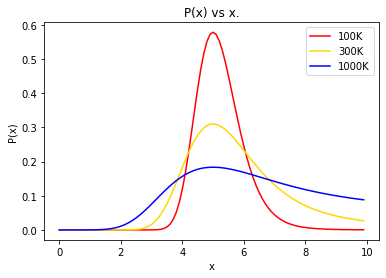

In [ ]:

import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
#define variables
#plt.close()
De = 10
a = 0.31
x0 = 5
t1=100 
t2=300
t3=1000
kB=8.314e-3
list = np.arange(0,10,.1)
p1.clear()
p2.clear()
p3.clear()
f= lambda x:exp(-De * (1 - exp( -a * (x - x0))) ** 2 / kB / t1) 
j = scipy.integrate.quad(f, 0, 10)
#f= lambda x:exp((10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / t1) 
#j = scipy.integrate.quad(f, 0, 5)
print(j)
p8=[]
for i in list:
  #num=math.pow(math.e,(10 * (1 - exp( -0.31 * (i - 5))) ** 2)/(kB * t1)) #p(x)=e^(-v(x)/kBT)
  num = exp(-De * (1 - exp( -a * (i - x0))) ** 2 / kB / t1) 
  #p1.append(num)
  p8.append(num/j[0])#
print(p8)
p2=[]
f= lambda x:exp((-10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / t2) 
j = scipy.integrate.quad(f, 0, 10)

for i in list:
  num1 = math.pow(math.e,(-10 * (1 - exp( -0.31 * (i - 5))) ** 2)/(kB*t2)) #p(x)=e^(-v(x)/kBT)/integral of same thing
  #p2.append(num1)
  p2.append(num1/j[0])

p3=[]
def f(x):
 return exp((-10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / t3) 
j = scipy.integrate.quad(f, 0, 10)
for i in list:
  num2=math.pow(math.e,(-10 * (1 - exp( -0.31 * (i - 5))) ** 2)/(kB*t3)) #p(x)=e^(-v(x)/kBT)
  #p3.append(num2)
  p3.append(num2/j[0])

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.plot(list,p8,color='red',label='100K')
plt.plot(list,p2,color='gold',label='300K')
plt.plot(list,p3,color='blue',label='1000K')
plt.legend()

9.046904623294301 / 1.727784507311328
18.462794764847892 / 3.2241818546066514
33.12016920486897 / 5.4462713630143025


<function matplotlib.pyplot.show>

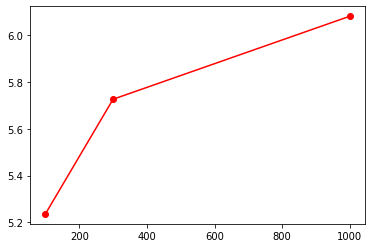

In [ ]:
#3d <x>
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
average = []

for n in [t1, t2, t3]:
  def f(x):
    return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  g = lambda x: x * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show



48.373630355097646 / 1.727784507311328
112.49884276346837 / 3.2241818546066514
222.2603504167122 / 5.4462713630143025


<function matplotlib.pyplot.show>

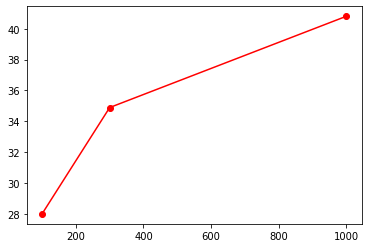

In [ ]:
#3d , <x**2>
average1=[]
#average1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  g = lambda x: x**2 * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

0.7934224436587274 / 1.727784507311328
4.388200421574912 / 3.2241818546066514
14.467408475530634 / 5.4462713630143025


<function matplotlib.pyplot.show>

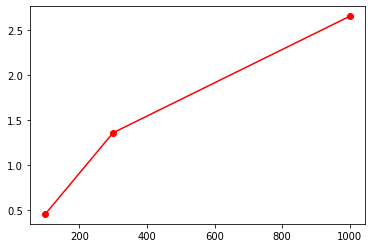

In [ ]:
#3d , <V1>
V1=[]
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  g = lambda x: 10 * (1 - exp( -0.31 * (x - 5))) ** 2 * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

# Question4

9000
[5.560568487270188, 5.560568487270188, 5.560568487270188, 5.560568487270188, 4.885424927351715, 4.885424927351715, 4.885424927351715, 4.885424927351715, 4.358968928947178, 4.358968928947178, 5.171393517908198, 5.588091618108186, 5.588091618108186, 5.588091618108186, 5.588091618108186, 5.588091618108186, 6.18887713508097, 5.943945408025353, 4.315564413169527, 4.315564413169527, 4.315564413169527, 4.315564413169527, 4.315564413169527, 4.315564413169527, 4.315564413169527, 4.471925124284261, 4.471925124284261, 4.471925124284261, 4.471925124284261, 4.471925124284261, 5.430541479593143, 5.430541479593143, 5.430541479593143, 5.430541479593143, 5.8299611974592125, 5.8299611974592125, 5.8299611974592125, 5.144766360613781, 4.857436215801429, 4.857436215801429, 4.857436215801429, 4.857436215801429, 4.857436215801429, 4.857436215801429, 4.857436215801429, 4.857436215801429, 4.117059206293508, 4.117059206293508, 4.117059206293508, 5.157765182577776, 5.157765182577776, 5.800973445589127, 5.80

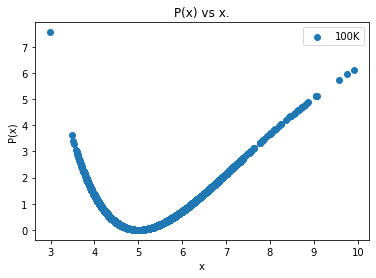

In [ ]:
#4b - 100 K

import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
De = 10
a = 0.31
x0 = 5
T = 100

def V1(x):
  return De * (1 - math.pow(math.e, -a * (x - x0))) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list3 =[] # creating a list for all the steps partook
eng_list3 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(10000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list3.append(new_energy) 
    steps_list3.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list3.append(old_energy)
    steps_list3.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list3 = steps_list3[1000:] #get rid of first 10% of steps
eng_list3 = eng_list3[1000:] #get rid of first 10% of energies
print(len(eng_list3)) #proofs that first 10% of the numbers were discarded
print(steps_list3)
print(eng_list3)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list3,eng_list3,label='100K')

plt.legend()

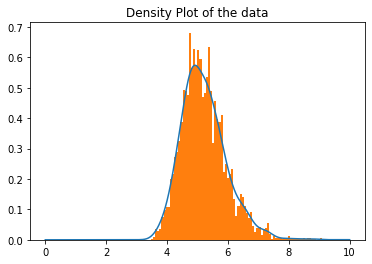

In [ ]:
#4b - 100K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list3)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0,10,10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list3, bins=100, density = True)
plt.show()

9000
[5.847047501048937, 5.847047501048937, 5.847047501048937, 5.847047501048937, 5.847047501048937, 5.847047501048937, 5.847047501048937, 5.847047501048937, 4.349443173353556, 4.349443173353556, 7.589617745939664, 8.118505103840501, 4.861931997149298, 4.861931997149298, 4.861931997149298, 4.907630566442, 4.907630566442, 4.907630566442, 4.907630566442, 4.907630566442, 4.907630566442, 5.617253724540612, 5.617253724540612, 5.617253724540612, 6.629063788250065, 6.629063788250065, 6.452272000345132, 6.452272000345132, 8.147240894697283, 8.486323445413028, 6.1073079554441945, 6.1073079554441945, 5.528385023714728, 5.505584885727105, 5.466218133793711, 5.466218133793711, 5.466218133793711, 5.466218133793711, 5.466218133793711, 5.466218133793711, 5.854141652921839, 4.919183702559567, 4.919183702559567, 4.919183702559567, 4.919183702559567, 4.919183702559567, 4.919183702559567, 4.919183702559567, 4.919183702559567, 4.919183702559567, 8.352956652735845, 8.114048158013755, 3.393201851063396, 7.3

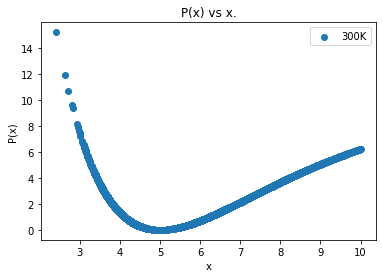

In [ ]:
#4b - 300 K

import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
De = 10
a = 0.31
x0 = 5
T = 300

def V1(x):
  return De * (1 - math.pow(math.e, -a * (x - x0))) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list4 =[] # creating a list for all the steps partook
eng_list4 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(10000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list4.append(new_energy) 
    steps_list4.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list4.append(old_energy)
    steps_list4.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list4 = steps_list4[1000:] #get rid of first 10% of steps
eng_list4 = eng_list4[1000:] #get rid of first 10% of energies
print(len(eng_list4)) #proofs that first 10% of the numbers were discarded
print(steps_list4)
print(eng_list4)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list4,eng_list4,label='300K')

plt.legend()

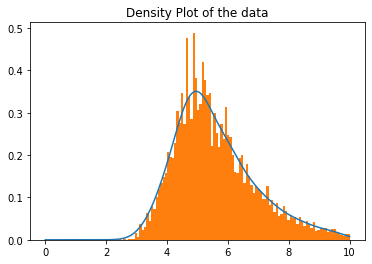

In [ ]:
#4b - 300K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list4)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0,10,10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list4, bins=100,density = True)
plt.show()

10000
[7.536633775231577, 5.702474300091843, 4.066796031265309, 8.211887125487841, 6.546775677409043, 7.637480840174779, 7.637480840174779, 4.878363735226027, 3.8340844551436692, 7.351107328249238, 4.874452898144649, 8.293221284499403, 4.628702038749055, 8.602378605583677, 5.330612102890288, 9.530482696906965, 9.977942046140296, 8.750043418655382, 3.819039761874624, 6.910639662223467, 6.910639662223467, 7.277584417177193, 6.485258509790729, 8.044347904911305, 3.1919881712134854, 3.1919881712134854, 3.9341255348947906, 7.83723001243911, 5.086428072637723, 6.481567904684807, 6.802458961117206, 7.401674546726039, 9.534578837193415, 5.365727775004134, 4.711806291754539, 8.273665882649425, 5.718039335511058, 5.31747735517452, 9.195539983293841, 8.93602780247284, 8.13325288894952, 9.06790511222479, 7.806559152547341, 6.153020815141636, 6.153020815141636, 8.311035943702372, 4.990915420453121, 4.990915420453121, 3.766203640461765, 7.632750943837312, 6.84593166269381, 7.70327898917141, 3.076151

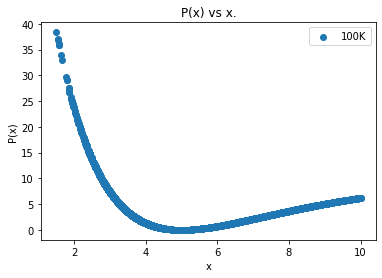

In [ ]:
#4b - 1000 K

import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
De = 10
a = 0.31
x0 = 5
T = 1000

def V1(x):
  return De * (1 - math.pow(math.e, -a * (x - x0))) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list5 =[] # creating a list for all the steps partook
eng_list5 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(10000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list5.append(new_energy) 
    steps_list5.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list5.append(old_energy)
    steps_list5.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list4 = steps_list5[1000:] #get rid of first 10% of steps
eng_list4 = eng_list5[1000:] #get rid of first 10% of energies
print(len(eng_list5)) #proofs that first 10% of the numbers were discarded
print(steps_list5)
print(eng_list5)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list5,eng_list5,label='100K')

plt.legend()

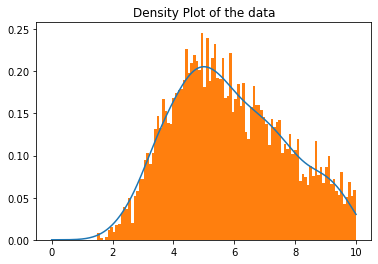

In [ ]:
#4b - 1000K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list5)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0,10,10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list5, bins=100, density = True)
plt.show()

<function matplotlib.pyplot.show>

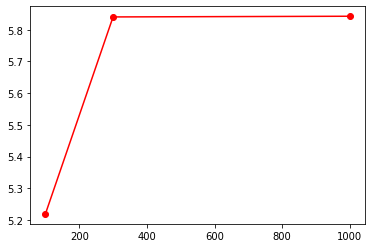

In [ ]:
#4d <x>
average = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg
for i in [steps_list3,steps_list4,steps_list5]:
  average.append(cal_average(i))
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

<function matplotlib.pyplot.show>

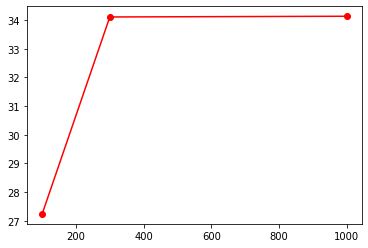

In [ ]:
#4d <x**2>
average1 = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg ** 2
for i in [steps_list3,steps_list4,steps_list5]:
  average1.append(cal_average(i))
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

0.7934224436587274 / 1.727784507311328
4.388200421574912 / 3.2241818546066514
14.467408475530634 / 5.4462713630143025


<function matplotlib.pyplot.show>

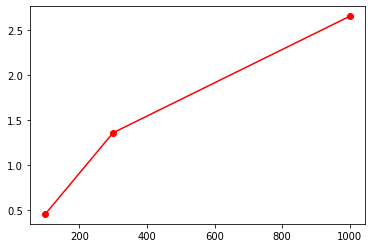

In [ ]:
#4d , <V1>
V1=[]
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  g = lambda x: 10 * (1 - exp( -0.31 * (x - 5))) ** 2 * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

# Question5

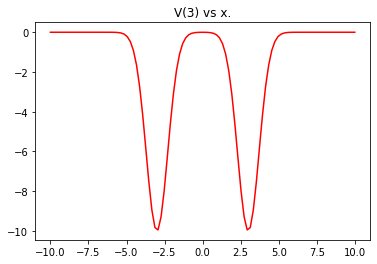

In [ ]:
#5a
import matplotlib.pyplot as plt
De = 10
a = 0.31
x0 = 5
x = np.linspace(-10,10,100)
def V3(x):
 return - 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)

plt.title("V(3) vs x.")
plt.plot(x,V3(x),color='red')

x(barrier)=6.330935775622493e-12
At 100K, P(left)=0.5000000000000004
At 100K, P(right)=0.49999999999999956
At 300K, P(left)=0.5000000000000503
At 300K, P(right)=0.4999999999999497
1.0001484471539297 26.865551347698194 0.03722791444738472
At 1000K, P(left)=0.5000000000002357
At 1000K, P(right)=0.4999999999997643


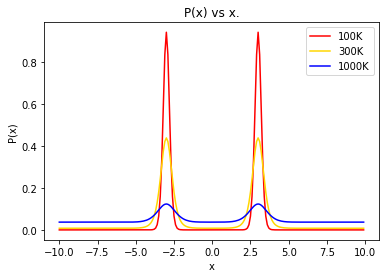

In [ ]:
#5b
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
#define variables
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
list = np.arange(-10,10,.1)
#p1.clear()
#p2.clear()
#p3.clear()

x_range = np.arange(-3,0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' +str(x_barrier))

f= lambda x:exp(-(- 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) / kB / t1) 
j = scipy.integrate.quad(f, -10, 10)
a = scipy.integrate.quad(f, -10, 6.330935775622493e-12)
print('At 100K, P(left)=' + str(a[0]/j[0]))
print('At 100K, P(right)=' + str(1-(a[0]/j[0])))
p1=[]
for i in list:
  num=math.pow(math.e,-(- 10 * exp(-(i + 3)**2) - 10 * exp(-(i - 3)**2))/(kB * t1)) #p(x)=e^(-v(x)/kBT)
  p1.append(num/j[0])


p2=[]
f= lambda x:exp(-(- 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) / kB / t2) 
j = scipy.integrate.quad(f, -10, 10)
a = scipy.integrate.quad(f, -10, 6.330935775622493e-12)
print('At 300K, P(left)=' + str(a[0]/j[0]))
print('At 300K, P(right)=' + str(1-(a[0]/j[0])))
for i in list:
  num1 = math.pow(math.e,-(- 10 * exp(-(i + 3)**2) - 10 * exp(-(i - 3)**2))/(kB*t2)) #p(x)=e^(-v(x)/kBT)/integral of same thing
  p2.append(num1/j[0])

p3=[]
def f(x):
 return exp(-(- 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) / kB / t3) 
j = scipy.integrate.quad(f, -10, 10)
print(f(-6),j[0],f(-6)/j[0])
a = scipy.integrate.quad(f, -10, 6.330935775622493e-12)
print('At 1000K, P(left)=' + str(a[0]/j[0]))
print('At 1000K, P(right)=' + str(1-(a[0]/j[0])))
for i in list:
  num2=math.pow(math.e,-(- 10 * exp(-(i + 3)**2) - 10 * exp(-(i - 3)**2))/(kB*t3)) #p(x)=e^(-v(x)/kBT)
  p3.append(num2/j[0])

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.plot(list,p1,color='red',label='100K')
plt.plot(list,p2,color='gold',label='300K')
plt.plot(list,p3,color='blue',label='1000K')
plt.legend()

0.0 / 177187.14727303266
0.0 / 125.33247812606233
0.0 / 26.865551347698194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


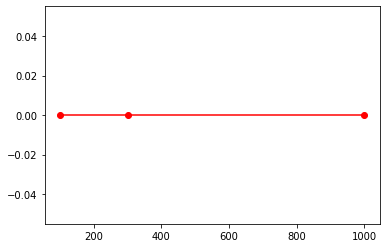

In [ ]:
#5f <x>
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
average = []

for n in [t1, t2, t3]:
  def f(x):
    return exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  g = lambda x: x * exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  k1 = scipy.integrate.quad(f, -10, 10)
  k2 = scipy.integrate.quad(g, -10, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show()


1603789.01986115 / 177187.14727303266
1635.4337196211009 / 125.33247812606233
731.1639722098929 / 26.865551347698194


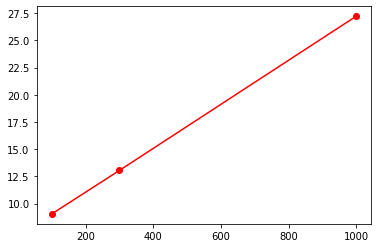

In [ ]:
#5f <x>
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
average = []

for n in [t1, t2, t3]:
  def f(x):
    return exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  g = lambda x: x ** 2 * exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  k1 = scipy.integrate.quad(f, -10, 10)
  k2 = scipy.integrate.quad(g, -10, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show()

-846069.0496718953 / 88593.57363651633
-468.872079132496 / 62.66623906303115
-43.648210373001476 / 13.432775673849095


<function matplotlib.pyplot.show>

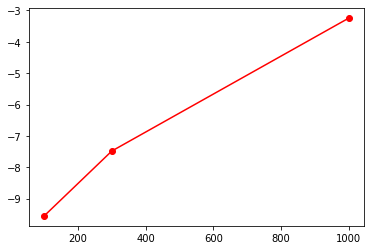

In [ ]:
#5f , <V1>
V1=[]
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  g = lambda x: (-10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) * exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

# Question6

99000
6852 + 93148


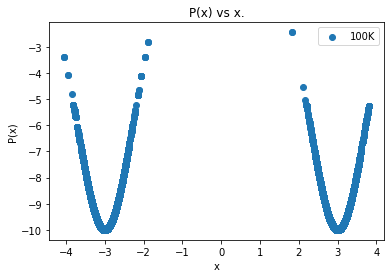

In [ ]:
#6b -100K
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
T = 100
k = 1
def V1(x):
  return - 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2) # defining equation for boltzmann distribution

old_num = random.uniform(-10,10) # picking a random number between 0 to 10
steps_list6 =[] # creating a list for all the steps partook
eng_list6 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < -10 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list6.append(new_energy) 
    steps_list6.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list6.append(old_energy)
    steps_list6.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < -10 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list6 = steps_list6[1000:] #get rid of first 10% of steps
eng_list6 = eng_list6[1000:] #get rid of first 10% of energies
print(len(eng_list6)) #proofs that first 10% of the numbers were discarded
#print(steps_list6)
#print(eng_list6)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list6,eng_list6,label='100K')

plt.legend()


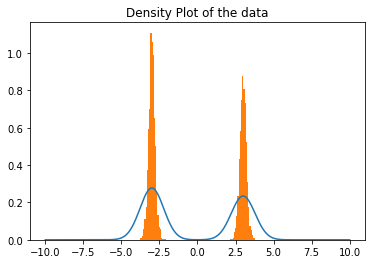

In [ ]:
#6b - 100K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde


prob_density = kde.gaussian_kde(steps_list6)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(-10,10,10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list6, bins=100, density = True)
plt.show()

In [ ]:
#5e
x_range = np.arange(-3,0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' +str(x_barrier))

f= lambda x:prob_density(x)
j = scipy.integrate.quad(f, -10, x_barrier)
print('At 100K, P(left)=' + str(j[0]))
print('At 100K, P(right)=' + str(1-(j[0])))


x(barrier)=6.330935775622493e-12
At 100K, P(left)=0.5416619994127928
At 100K, P(right)=0.4583380005872072


9000
[-2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -2.627413656909594, -3.078240803020666, -3.078240803020666, -3.078240803020666, -3.078240803020666, -3.078240803020666, -3.078240803020666, -3.078240803020666, -3.078240803020666, -3.078240803020666, -3.078240803020666, -2.9998580117540383, -2.8938642222303583, -2.8938642222303583, -5.598031553651516, -6.578515263166059, -2.520896389632009, -2.520896389632009, -2.520896389632009, -2.520896389632009, -2.520896389632009, -2.520896389632009, -2.520896389632009, -2.520896389632009, -2.520896389632009, -1.7336093592515187, -0.015728738475342396, 0.5515079653538937, 2.177623406497343, 2.177623406497343, 2.177623406497343, 2.177623406497343, 4.036900748764106, 4.036900748764106, 1.4246346564178491, -2.4271234782

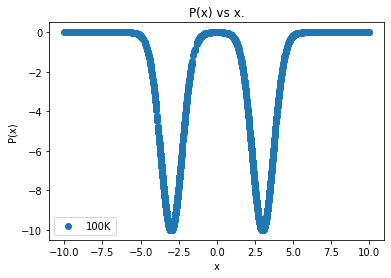

In [ ]:
#6b -300K
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
T = 300
k = 1
def V1(x):
  return - 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2) # defining equation for boltzmann distribution

old_num = random.uniform(-10,10) # picking a random number between 0 to 10
steps_list7 =[] # creating a list for all the steps partook
eng_list7 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < -10 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(10000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list7.append(new_energy) 
    steps_list7.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list7.append(old_energy)
    steps_list7.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < -10 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list7 = steps_list7[1000:] #get rid of first 10% of steps
eng_list7 = eng_list7[1000:] #get rid of first 10% of energies
print(len(eng_list7)) #proofs that first 10% of the numbers were discarded
print(steps_list7)
print(eng_list7)
print('{} + {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list7,eng_list7,label='100K')

plt.legend()


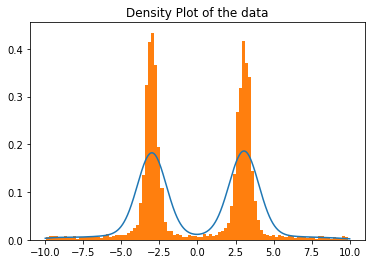

In [ ]:
#6b - 300K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list7)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(-10,10,10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list7, bins=100, density = True)
plt.show()

In [ ]:
#6e - 300K
x_range = np.arange(-3,0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' +str(x_barrier))

f= lambda x:prob_density(x)
j = scipy.integrate.quad(f, -10, x_barrier)
print('At 300K, P(left)=' + str(j[0]))
print('At 300K, P(right)=' + str(1-(j[0])))


x(barrier)=6.330935775622493e-12
At 300K, P(left)=0.4908234692605292
At 300K, P(right)=0.5091765307394708


9000
[-6.249815544660572, -2.1299019708897005, -5.642846080097698, -2.092847513473769, -2.5149499080954865, -2.5149499080954865, -2.5149499080954865, 1.4861449157879676, 1.7082512683020443, -2.1011404628997257, -1.3019286773248568, 1.4729893174864062, -0.6537144430282349, 2.314151130845588, 2.314151130845588, -0.6712837243796117, -5.241136044076299, -7.070578193635978, -3.180601275134757, -3.180601275134757, -3.180601275134757, -3.180601275134757, -3.180601275134757, -2.8269444838301627, -2.8269444838301627, -6.3902054205829515, -9.27820949594496, -8.291567035849042, -6.163560937800785, -7.668810970621899, -6.563580837489252, -5.167716824479837, -5.332516672850683, -8.890479082116395, -7.5008300090700395, -8.359416053259043, -5.574131675732561, -8.862679547699683, -7.1440949037729125, -3.381743069956861, -2.7534210828303385, -2.7534210828303385, -5.263574954729473, -8.743171972347886, -8.17207123414308, -9.939165138006198, -9.291815844825575, -6.9026231999376755, -4.5539447629620735, -

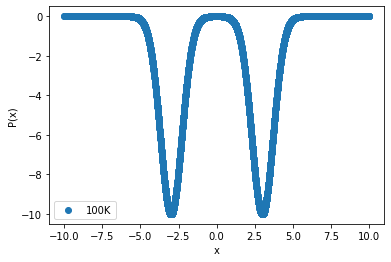

In [ ]:
#6b -1000K
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
T = 1000
k = 1
def V1(x):
  return - 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2) # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list8 =[] # creating a list for all the steps partook
eng_list8 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < -10 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(10000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list8.append(new_energy) 
    steps_list8.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list8.append(old_energy)
    steps_list8.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < -10 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list8 = steps_list8[1000:] #get rid of first 10% of steps
eng_list8 = eng_list8[1000:] #get rid of first 10% of energies
print(len(eng_list8)) #proofs that first 10% of the numbers were discarded
print(steps_list8)
print(eng_list8)
print('{} + {}'.format(naccept, nreject))

#plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list8,eng_list8,label='100K')

plt.legend()

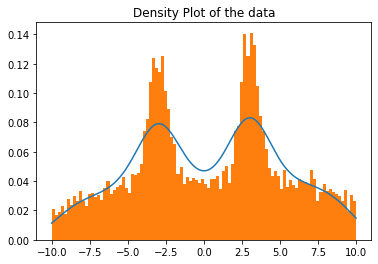

In [ ]:
#6b - 1000K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list8)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(-10,10,10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list8, bins=100, density = True)
plt.show()

In [ ]:
#6e - 1000K
x_range = np.arange(-3,0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' +str(x_barrier))

f= lambda x:prob_density(x)
j = scipy.integrate.quad(f, -10, x_barrier)
print('At 1000K, P(left)=' + str(j[0]))
print('At 1000K, P(right)=' + str(1-(j[0])))

x(barrier)=6.330935775622493e-12
At 1000K, P(left)=0.46826821019675513
At 1000K, P(right)=0.5317317898032449


<function matplotlib.pyplot.show>

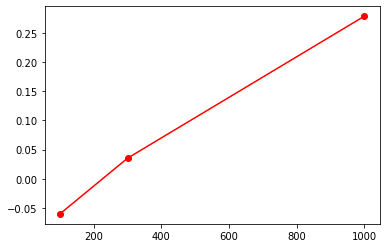

In [ ]:
average = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg
for i in [steps_list6,steps_list7,steps_list8]:
  average.append(cal_average(i))
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

<function matplotlib.pyplot.show>

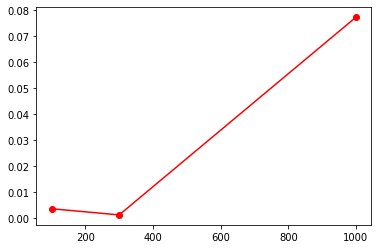

In [ ]:
average1 = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg ** 2
for i in [steps_list6,steps_list7,steps_list8]:
  average1.append(cal_average(i))
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

-811703.9531739424 / 88593.57363651633
-416.84938647656895 / 62.66623906303115
-34.354081470779526 / 13.432775673849095


<function matplotlib.pyplot.show>

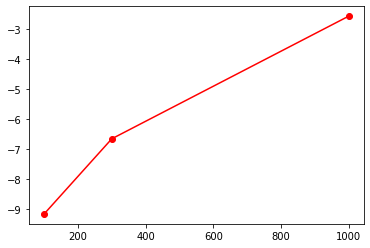

In [ ]:
#3d , <V1>
V1=[]
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp(-(- 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) / kB / n) 
  g = lambda x: - 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2) ** 2 * exp(-(- 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show